In [10]:
import pandas as pd 
import numpy as np


In [11]:
import zipfile
zip_ref = zipfile.ZipFile("/content/ieee-fraud-detection.zip", 'r')
zip_ref.extractall()


df1 = pd.read_csv("/content/data_identity.csv")
df2 = pd.read_csv("/content/data_transaction.csv")


#### Prepare dataframes and join them and split into train - test

In [12]:
print(df1.isna().sum()/len(df1))
print(df1.shape)

TransactionID    0.000000
id_01            0.000000
id_02            0.023303
id_03            0.540161
id_04            0.540161
id_05            0.051084
id_06            0.051084
id_07            0.964259
id_08            0.964259
id_09            0.480521
id_10            0.480521
id_11            0.022568
id_12            0.000000
id_13            0.117262
id_14            0.445037
id_15            0.022519
id_16            0.103257
id_17            0.033723
id_18            0.687221
id_19            0.034077
id_20            0.034472
id_21            0.964231
id_22            0.964162
id_23            0.964162
id_24            0.967088
id_25            0.964419
id_26            0.964204
id_27            0.964162
id_28            0.022568
id_29            0.022568
id_30            0.462224
id_31            0.027393
id_32            0.462079
id_33            0.491871
id_34            0.460560
id_35            0.022519
id_36            0.022519
id_37            0.022519
id_38       

##### 1.1 select features:

In [13]:
def getNewData(X,nan_percent):
  """create new df without features with numbers of nan > nan_percent """
  cols = X.columns
  percents_err =  list(X.isna().sum()/len(X))
  ind = [i for i in range(len(percents_err)) if percents_err[i]< nan_percent]
  return X[cols[ind]]

df1 =  getNewData(df1,0.2)
df2 =  getNewData(df2,0.2)


In [14]:
from sklearn.model_selection import train_test_split

FULL_ZZY_df = df2.set_index('TransactionID').join(df1.set_index('TransactionID')).iloc[:50000]
#assert df2.shape[0] == FULL_ZZY_df.shape[0] 
#assert df2.shape[1] + df1.shape[1] - 2 == FULL_ZZY_df.shape[1] 

y = FULL_ZZY_df.isFraud
X = FULL_ZZY_df.drop(columns = 'isFraud')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

assert sum(y_test) / sum(y) <0.3 
assert sum(y_test) / sum(y) > 0.1
del y 
del X

In [15]:
# create indicator 
X_train

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3026087,952487,107.95,W,17400,174.0,150.0,visa,226.0,debit,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3017893,768834,25.00,S,13366,437.0,150.0,visa,226.0,debit,337.0,...,368.0,Found,Found,chrome 61.0 for android,T,F,T,T,mobile,LGLS775 Build/NRD90U
3032278,1095411,30.00,H,1724,583.0,150.0,visa,226.0,credit,420.0,...,144.0,Found,Found,chrome 62.0,T,F,T,T,desktop,Windows
3003398,435419,644.95,W,11106,100.0,150.0,visa,226.0,credit,337.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000653,400238,100.00,W,9002,453.0,150.0,visa,226.0,debit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998284,334813,280.00,W,12501,490.0,150.0,visa,226.0,debit,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031732,1086378,140.47,W,12695,490.0,150.0,visa,226.0,debit,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3025158,940430,115.00,W,11839,490.0,150.0,visa,226.0,debit,512.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ind_obj = np.where((X_train.dtypes == object) == True)
LENS = []
for i in range(ind_obj[0].shape[0]):
  LENS.append(pd.get_dummies(X_train[X_train.columns[ind_obj[0][i]]]).shape[1])

In [17]:
ind_for_dummies = np.where(np.array(LENS) <= 5 )
ind_for_embed = np.where(np.array(LENS) > 5 )

X_train = X_train.drop(columns = X_train.columns[ind_obj[0][ind_for_embed]])
X_test  = X_test.drop(columns = X_test.columns[ind_obj[0][ind_for_embed]])


In [18]:
X = getNewData(X_train,0.2)
X_test = getNewData(X_test,0.2)


In [19]:
ind =[]
k=0
for st in X.dtypes:
  if st == object:
    ind.append(k)
  k+=1  

In [20]:
X[X.columns[ind]].isna().sum()

ProductCD    0
card4        5
card6        2
dtype: int64

In [21]:
set(X[X.columns[ind]]['card6'])

{'charge card', 'credit', 'debit', 'debit or credit', nan}

In [22]:
set(X[X.columns[ind]]['card4'])

{'american express', 'discover', 'mastercard', nan, 'visa'}

In [23]:
X.shape

(40000, 112)

In [24]:
X_new  = pd.get_dummies(X, dummy_na=True)
X_t = pd.get_dummies(X_test, dummy_na=True)

X_new.loc[X_new.card6_nan == 1, ["card6_charge card"	,"card6_credit"	,"card6_debit"	,"card6_debit or credit"]] = np.nan
X_new.loc[X_new.card4_nan == 1, ["card4_american express"	,"card4_discover"	,"card4_mastercard"	,"card4_visa"]] = np.nan

X_t.loc[X_t.card6_nan == 1, ["card6_charge card"	,"card6_credit"	,"card6_debit"	,"card6_debit or credit"]] = np.nan
X_t.loc[X_t.card4_nan == 1, ["card4_american express"	,"card4_discover"	,"card4_mastercard"	,"card4_visa"]] = np.nan

del X_new["card6_nan"]
del X_new["card4_nan"]
del X_t["card6_nan"]
del X_t["card4_nan"]


In [25]:
I_t = np.ones_like(X_t)
indexes_for_nan =  np.where(X_t.isna()==True)


In [26]:
## import torch
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import TensorDataset, DataLoader
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
I = np.ones_like(X_new)
indexes_for_nan =  np.where(X_new.isna()==True)
for i in range(indexes_for_nan[0].shape[0]):
  I[indexes_for_nan[0][i]][indexes_for_nan[1][i]] = 0
Matrix = np.zeros((2,X_new.shape[0],X_new.shape[1]))
Matrix.shape  
#X = X.fillna(0)  

(2, 40000, 123)

In [28]:
Matrix[0] = X_new.fillna(0).values
Matrix[1] = I


In [29]:
## Undercomplete
class autoencoder(nn.Module):
    def __init__(self, input_size, latent_dim):
      super(autoencoder, self).__init__()
      # Step 1 : Define the encoder 
      # Step 2 : Define the decoder
      # Step 3 : Initialize the weights (optional)
      self.encoder = nn.Sequential(
          nn.Linear(input_size, input_size//2),
          nn.ReLU(True),
          nn.Dropout(0.2),
          nn.Linear(input_size//2, input_size//3),
          nn.Linear(input_size//3, input_size//4),
          nn.Tanh(),
          nn.Dropout(0.2),
          nn.Linear(input_size//4, latent_dim)
      )
      self.decoder = nn.Sequential(
          nn.Linear(latent_dim, input_size//4),
          nn.ReLU(True),
          nn.Dropout(0.2),
          nn.Linear(input_size//4, input_size//3),
          nn.Linear(input_size//3, input_size//2),
          nn.Tanh(),
          nn.Dropout(0.2),
          nn.Linear(input_size//2, input_size)
      )
      self.encoder.apply(self.__init_weights)
      self.decoder.apply(self.__init_weights)
        
    def forward(self, x):
      # Step 1: Pass the input through encoder to get latent representation
      # Step 2: Take latent representation and pass through decoder
      X = x[0]*x[1]
      X = self.encoder(X)
      X = self.decoder(X)
      return X
    def Indicator(self,x):
      return x[1]
        
    
    def encode(self,input):
      #Step 1: Pass the input through the encoder to get latent representation
      return self.encoder(input)
    
    def __init_weights(self,m):
      #Init the weights (optional)
      if type(m) == nn.Linear:
          torch.nn.init.xavier_uniform_(m.weight)
          m.bias.data.fill_(0.01)

In [30]:
learning_rate = 0.0001
num_epochs = 50
inp_size = X_new.shape[1]
lat_size = 20
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

AE = autoencoder(inp_size,lat_size).to(device)

In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [31]:

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(AE.parameters(),lr=learning_rate)

#Create a random dataset
data_loader = DataLoader(TensorDataset(torch.from_numpy(Matrix)),batch_size=32,shuffle=True)

epoch [1/50], loss:5297.4746
epoch [2/50], loss:2940.4109
epoch [3/50], loss:2879.7905
epoch [4/50], loss:2798.1013
epoch [5/50], loss:5297.4673
epoch [6/50], loss:5297.4673
epoch [7/50], loss:2604.4524
epoch [8/50], loss:5297.4658
epoch [9/50], loss:5297.4634
epoch [10/50], loss:5297.4634
epoch [11/50], loss:2401.7664
epoch [12/50], loss:5297.4614
epoch [13/50], loss:2294.8398
epoch [14/50], loss:5297.4595
epoch [15/50], loss:5297.4585
epoch [16/50], loss:2168.6111
epoch [17/50], loss:2136.0042
epoch [18/50], loss:2093.9014
epoch [19/50], loss:2056.9084
epoch [20/50], loss:2002.8256
epoch [21/50], loss:1962.9615
epoch [22/50], loss:5297.4531
epoch [23/50], loss:5297.4512
epoch [24/50], loss:5297.4507
epoch [25/50], loss:5297.4507
epoch [26/50], loss:1800.9198
epoch [27/50], loss:5297.4482
epoch [28/50], loss:5297.4473
epoch [29/50], loss:5297.4468
epoch [30/50], loss:5297.4458
epoch [31/50], loss:5297.4443
epoch [32/50], loss:5297.4438
epoch [33/50], loss:1707.7915
epoch [34/50], loss

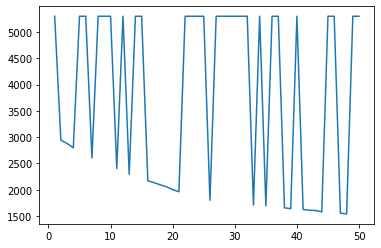

In [32]:
import matplotlib.pyplot as plt
recon_train = [] 
losses = []
for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in data_loader:
    X = X[0].to(device)
    
    optimizer.zero_grad()
    # forward
    output = AE(X.float())
    
    loss = criterion(output*X.float()[1], X.float()[0])
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  losses.append(epoch_loss)
  # log
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
plt.plot(range(1,num_epochs+1),losses)  
  

In [33]:
#data_loader = DataLoader(TensorDataset(torch.from_numpy(Matrix)),batch_size=32,shuffle=False)
tr = torch.from_numpy(Matrix).to(device)
train_reconstructed = AE(tr.float())
del tr

In [34]:
train_results = (np.ones_like(Matrix[0]) - Matrix[1]) * train_reconstructed.detach().cpu().numpy()+ Matrix[0]

In [35]:
#del Matrix
del train_reconstructed

In [36]:
I_t = np.ones_like(X_t)
indexes_for_nan =  np.where(X_t.isna()==True)
for i in range(indexes_for_nan[0].shape[0]):
  I_t[indexes_for_nan[0][i]][indexes_for_nan[1][i]] = 0
Matrix_t = np.zeros((2,X_t.shape[0],X_t.shape[1]))
#X = X.fillna(0)  
Matrix_t[0] = X_t.fillna(0).values
Matrix_t[1] = I_t
tst = torch.from_numpy(Matrix_t).to(device)
test_reconstructed = AE(tst.float())

test_results = (np.ones_like(Matrix_t[0]) - Matrix_t[1]) * test_reconstructed.detach().cpu().numpy()+ Matrix_t[0]


In [37]:
from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PassiveAggressiveClassifier


In [38]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_n = sc.fit_transform(X_new.fillna(0))
clf = LogisticRegression(random_state=0).fit(X_n, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
X_te = sc.fit_transform(X_t.fillna(0))
y_pred = clf.predict(X_te)
print(classification_report(y_test,y_pred,digits = 6))
#print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0   0.974534  0.998972  0.986602      9730
           1   0.615385  0.059259  0.108108       270

    accuracy                       0.973600     10000
   macro avg   0.794959  0.529116  0.547355     10000
weighted avg   0.964837  0.973600  0.962882     10000



In [40]:
del X_n 
del X_te


In [41]:
recon = sc.fit_transform(train_results)
test_recon = sc.fit_transform(test_results)#test_reconstructed.cpu().detach().numpy())
clf = LogisticRegression(random_state=0).fit(recon, y_train)
y_pred_recon = clf.predict(test_recon)
classification_report(y_test,y_pred_recon)
print(classification_report(y_test,y_pred_recon))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9730
           1       0.59      0.06      0.11       270

    accuracy                           0.97     10000
   macro avg       0.78      0.53      0.55     10000
weighted avg       0.96      0.97      0.96     10000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
del test_recon 
del recon
del clf


#### PCA

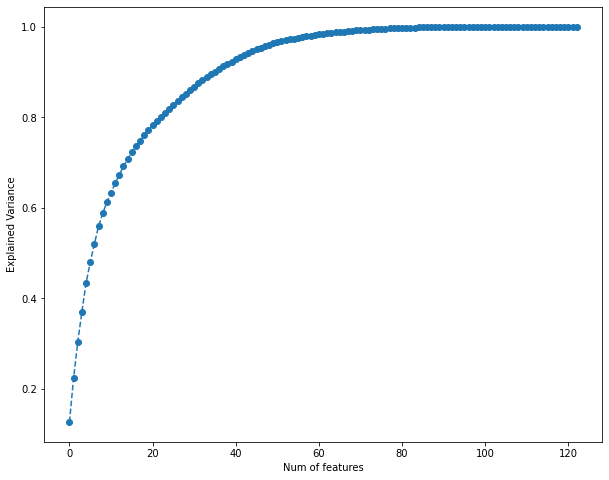

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



norm_data = StandardScaler().fit_transform(train_results)

#scaler = StandardScaler()
#data = scaler.fit_transform(df_an)
# del X_new
# del I 
# del Matrix
pca = PCA()
pca.fit(norm_data)
plt.figure(figsize=(10,8))
plt.plot(range(0,(X_t.shape[1])), pca.explained_variance_ratio_.cumsum(), marker ='o', linestyle = '--')
plt.xlabel("Num of features")
plt.ylabel("Explained Variance")
#plt.title("Graph for pick num of importnt features ")
#plt.savefig("PCA.eps" , format='eps')
plt.show()


In [44]:
sc = StandardScaler()
pca = PCA(n_components=60)
recon = pca.fit_transform(sc.fit_transform(train_results))

test_recon = sc.fit_transform(test_results)#test_reconstructed.cpu().detach().numpy())
test_recon = pca.fit_transform(test_recon)
clf = LogisticRegression(random_state=0).fit(recon, y_train)
y_pred_recon = clf.predict(test_recon)
classification_report(y_test,y_pred_recon)
print(classification_report(y_test,y_pred_recon))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9730
           1       0.14      0.04      0.07       270

    accuracy                           0.97     10000
   macro avg       0.56      0.52      0.53     10000
weighted avg       0.95      0.97      0.96     10000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### LDA

In [45]:
#import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components= 1)
sc = StandardScaler()

recon = lda.fit_transform(sc.fit_transform(train_results),y_train)

test_recon = sc.fit_transform(test_results)#test_reconstructed.cpu().detach().numpy())
test_recon = lda.fit_transform(test_recon,y_test)
clf = LogisticRegression(random_state=0).fit(recon, y_train)
y_pred_recon = clf.predict(test_recon)
classification_report(y_test,y_pred_recon)
print(classification_report(y_test,y_pred_recon))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9730
           1       0.82      0.12      0.21       270

    accuracy                           0.98     10000
   macro avg       0.90      0.56      0.60     10000
weighted avg       0.97      0.98      0.97     10000



In [46]:
import gc
gc.collect()

68

### NOIZY AE

epoch [1/50], loss:1512.1433
epoch [2/50], loss:1505.4075
epoch [3/50], loss:5297.5576
epoch [4/50], loss:5297.5571
epoch [5/50], loss:5297.5566
epoch [6/50], loss:1468.5172
epoch [7/50], loss:5297.5552
epoch [8/50], loss:5297.5547
epoch [9/50], loss:1452.7490
epoch [10/50], loss:5297.5532
epoch [11/50], loss:1438.7406
epoch [12/50], loss:1429.5790
epoch [13/50], loss:5297.5508
epoch [14/50], loss:5297.5513
epoch [15/50], loss:5297.5498
epoch [16/50], loss:5297.5493
epoch [17/50], loss:1396.0685
epoch [18/50], loss:5297.5493
epoch [19/50], loss:1382.8901
epoch [20/50], loss:5297.5474
epoch [21/50], loss:5297.5474
epoch [22/50], loss:1362.0739
epoch [23/50], loss:5297.5464
epoch [24/50], loss:1365.4598
epoch [25/50], loss:5297.5444
epoch [26/50], loss:1343.3739
epoch [27/50], loss:5297.5435
epoch [28/50], loss:1345.1678
epoch [29/50], loss:5297.5415
epoch [30/50], loss:1324.6495
epoch [31/50], loss:1317.0004
epoch [32/50], loss:1307.6659
epoch [33/50], loss:1297.0106
epoch [34/50], loss

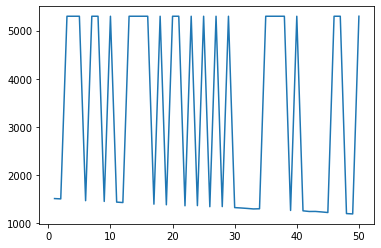

In [47]:
recon_train = [] 
losses = []
normal = torch.distributions.Normal(0, 0.5)

def add_noise(x, device=device): 
    return x + normal.sample(sample_shape=torch.Size(x.shape))


for epoch in range(num_epochs):
  epoch_loss = 0.0
  for X in data_loader:
    X = add_noise(X[0]).to(device)
    
    optimizer.zero_grad()
    # forward
    output = AE(X.float())
    
    loss = criterion(output*X.float()[1], X.float()[0])
    # backward
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()
  losses.append(epoch_loss)
  # log
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.item()))
plt.plot(range(1,num_epochs+1),losses)  
  

In [48]:
#data_loader = DataLoader(TensorDataset(torch.from_numpy(Matrix)),batch_size=32,shuffle=False)
tr = torch.from_numpy(Matrix).to(device)
train_reconstructed = AE(tr.float())
del tr
train_results = (np.ones_like(Matrix[0]) - Matrix[1]) * train_reconstructed.detach().cpu().numpy()+ Matrix[0]
del train_reconstructed

I_t = np.ones_like(X_t)
indexes_for_nan =  np.where(X_t.isna()==True)
for i in range(indexes_for_nan[0].shape[0]):
  I_t[indexes_for_nan[0][i]][indexes_for_nan[1][i]] = 0
Matrix_t = np.zeros((2,X_t.shape[0],X_t.shape[1]))
#X = X.fillna(0)  
Matrix_t[0] = X_t.fillna(0).values
Matrix_t[1] = I_t
tst = torch.from_numpy(Matrix_t).to(device)
test_reconstructed = AE(tst.float())

test_results = (np.ones_like(Matrix_t[0]) - Matrix_t[1]) * test_reconstructed.detach().cpu().numpy()+ Matrix_t[0]


In [49]:
recon = sc.fit_transform(train_results)
test_recon = sc.fit_transform(test_results)#test_reconstructed.cpu().detach().numpy())
clf = LogisticRegression(random_state=0).fit(recon, y_train)
y_pred_recon = clf.predict(test_recon)
classification_report(y_test,y_pred_recon)
print(classification_report(y_test,y_pred_recon))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9730
           1       0.56      0.06      0.10       270

    accuracy                           0.97     10000
   macro avg       0.76      0.53      0.54     10000
weighted avg       0.96      0.97      0.96     10000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### VAE 

In [59]:

# VAE model
import torch.nn.functional as F

input_size = train_results.shape[1]
losses_vae=[]
z_dim=20

class VAE(nn.Module):
    def __init__(self, input_size=input_size, h_dim=400, z_dim=z_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_size, h_dim)
        self.fc2 = nn.Linear(h_dim, z_dim)
        self.fc3 = nn.Linear(h_dim, z_dim)
        self.fc4 = nn.Linear(z_dim, h_dim)
        self.fc5 = nn.Linear(h_dim, input_size)
        
    def encode(self, x):
        #print(x.shape)
        h = F.relu(self.fc1(x))
        return self.fc2(h), self.fc3(h)
    
    def reparameterize(self, mu, log_var):
        std = torch.exp(log_var/2)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.fc4(z))
        return F.sigmoid(self.fc5(h))
    
    def forward(self, x):
        mu, log_var = self.encode(x[0]*x[1])
        z = self.reparameterize(mu, log_var)
        x_reconst = self.decode(z)
        return x_reconst, mu, log_var
     

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


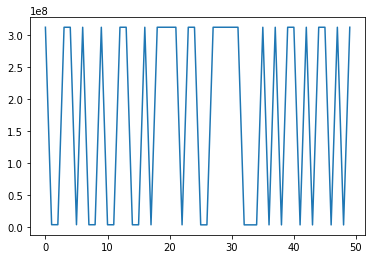

In [65]:
#device = torch.device('cuda:2')  # GPU 2 (these are 0-indexed)


model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
input_size = train_results.shape[0]
Matrix[0] =  Matrix[0]/ np.max(Matrix[0]) 
data_loader = DataLoader(TensorDataset(torch.from_numpy(Matrix)),batch_size=32,shuffle=True)


for epoch in range(num_epochs):
    i=0
    for  X in (data_loader):
        # Forward pass
        X = X[0].to(device)
        output, mu, log_var = model(X.float())
        
        # Compute reconstruction loss and kl divergence
        # For KL divergence, see Appendix B in VAE paper or http://yunjey47.tistory.com/43
        reconst_loss = F.binary_cross_entropy(output*X.float()[1], X.float()[0], size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        # Backprop and optimize
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 50 == 0:
          print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}".format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))
        i+=1    

        losses_vae.append(reconst_loss.item())
plt.plot(range(len(losses_vae)),losses_vae)   

In [66]:
X[0].shaprecon = sc.fit_transform(train_results)
test_recon = sc.fit_transform(test_results)#test_reconstructed.cpu().detach().numpy())
clf = LogisticRegression(random_state=0).fit(recon, y_train)
y_pred_recon = clf.predict(test_recon)
classification_report(y_test,y_pred_recon)
print(classification_report(y_test,y_pred_recon))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      9730
           1       0.56      0.06      0.10       270

    accuracy                           0.97     10000
   macro avg       0.76      0.53      0.54     10000
weighted avg       0.96      0.97      0.96     10000



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
